# InstaBot - Part 2


In [66]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re
from nltk import FreqDist
import operator
from selenium.common.exceptions import NoSuchElementException

## 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers

In [104]:
# Login to Instagram Handle
driver = webdriver.Chrome(executable_path = 'chromedriver')
driver.get('https://www.instagram.com/')
wait = WebDriverWait(driver, 10)
username = wait.until(EC.presence_of_element_located((By.NAME,'username')))  
username.send_keys("SAMPLE USERNAME")
password = wait.until(EC.presence_of_element_located((By.NAME,'password'))) 
password.send_keys("SAMPLE PASSWORD")
submit_btn = driver.find_element_by_tag_name("button")                    
submit_btn.submit()
time.sleep(5)

### a). From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers


In [68]:
def text_box(search_this):
    try:
        driver.maximize_window()
        text_box = driver.find_element_by_class_name('x3qfX')   # locate search box
        text_box.clear()                                        # Clear search box
        text_box.send_keys(search_this)# Send keys
    except NoSuchElementException:
        pass
def food_handles() :
    try:
        text_box('food') 
        time.sleep(4)
        l = driver.find_elements_by_class_name('yCE8d') 
        h = []
        handles= []
        for i in l:
            if ('locations' not in i.get_attribute('href'))  and ('tags' not in i.get_attribute('href')) :
                h.append(i)
        for j in h :
            handles.append(j.find_element_by_xpath('div/div[2]/div/span').text)
    except NoSuchElementException:
        pass
    return handles
handle_name = food_handles()[:11]
followers = []
for i in handle_name:
    try:
        text_box(i)           # Search handle
        h = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c'))) 
        h.click()
        time.sleep(3)
        x = driver.find_element_by_partial_link_text("followers")
        time.sleep(2)
        followers.append(x.text)
    except NoSuchElementException:
        pass


In [69]:
d = {}
for i in range(10):
    d[handle_name[i]] = followers[i]

In [70]:
# removing the word 'followers' from handle_name
for i in d:
    d[i] = d[i].split(' ')
    d[i] = d[i][0]

#converting from string to float
for i in d:
    if 'm' in d[i]:
        y = float(d[i][:-1])
        d[i] = y*(10**6)
    elif 'k' in d[i]:
        y = float(d[i][:-1])
        d[i] = y*(10**3)
    elif ',' in d[i]:
        d[i] = float(d[i].replace(',' , ''))
    else:
        d[i]=float(d[i])
        
#SORTING
top5 = sorted(d.items(), key=lambda kv:kv[1], reverse=True)[:5]
handles = []
followers = []

print('Food Handles with Top 5 Number of Followers:\n')
for i in top5:
    print(i[0], i[1])
    handles.append(i[0])
    followers.append(i[1])

Food Handles with Top 5 Number of Followers:

yourfoodlab 1300000.0
foodfoodtv 246000.0
food_lunatic 92600.0
foodfoododo 27400.0
foodiebliss09 16300.0


In [71]:
wait = WebDriverWait(driver,20)

In [72]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

### b). Now Find the number of posts these handles have done in the previous 3 days.

In [73]:
def Post_count(insta_handles) :
    d = {} 
    #cCounting Number of posts in past 3 days
    for i in insta_handles :
        driver.get('https://www.instagram.com/' +str(i)+'/') # visiting the most popular 5 handles
        time.sleep(3)
        posts = driver.find_elements_by_class_name('v1Nh3') # finding all posts on page
        count = 0
        posts[0].click() # clicking on first post
        while True : 
            try :
                time.sleep(3)
                upload_time = driver.find_element_by_class_name('_1o9PC').text.split(" ") # extracting text of time
                if (upload_time[1] == 'HOURS' or upload_time[1] == 'HOUR' or upload_time[1] == 'MINUTES') : # checking condns
                    count += 1
                elif (int(upload_time[0]) < 3) : # if > 3 days then break
                    count += 1
                else :
                    break
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
            except ValueError :
                    break
        d[i] = count # updating dictionary
    return d

no_of_post={}
cnt = [] 
for handle in top_5_blog:
    a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')   #input box 
    a.send_keys(handle)                                                         #send hadles to search box
    # b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))          #first profile
    time.sleep(2)
    handles = driver.find_element_by_xpath('//a[@class = "-qQT3"]') # fetching handles 
    handles.click() # clicking on handle
    a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')  #clearing input box
    a.clear()
    
    i = 0
    
    
    for i in range(7):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')              
        #scrolling 7 time down
        time.sleep(1)
    data = driver.find_elements_by_class_name("v1Nh3") y

In [74]:
d = Post_count(handles)

In [75]:
print('Food Handle Name', ':', 'Number of posts in previous 3 days')
for j in d :
    print(j,':', d[j])

Food Handle Name : Number of posts in previous 3 days
yourfoodlab : 5
foodfoodtv : 3
food_lunatic : 5
foodfoododo : 7
foodiebliss09 : 2


In [76]:
handles

['yourfoodlab', 'foodfoodtv', 'food_lunatic', 'foodfoododo', 'foodiebliss09']

In [90]:
followers

[1300000.0, 246000.0, 92600.0, 27400.0, 16300.0]

### c). Depict this information using a suitable graph.


dict_keys(['yourfoodlab', 'foodfoodtv', 'food_lunatic', 'foodfoododo', 'foodiebliss09'])


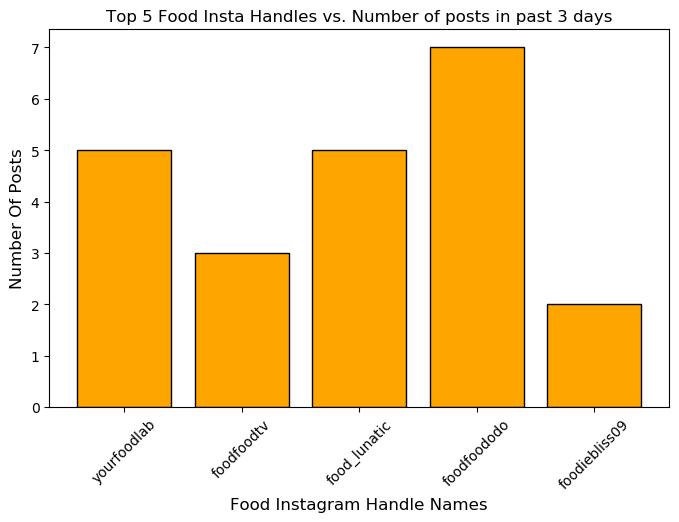

In [77]:
page_name = d.keys() # extracting name of handles
count = d.values() # number of posts in previous 3 days
print(page_name)

plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.bar(page_name, count, color = 'orange', edgecolor = 'black')
plt.title('Top 5 Food Insta Handles vs. Number of posts in past 3 days')
plt.xlabel('Food Instagram Handle Names', size = 12)
plt.ylabel('Number Of Posts', size = 12)
plt.xticks(rotation = 45)
plt.show()

## 2. Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.


In [78]:
posts = {} # a dictionary with keys corresponding to profiles with value as a list, each item contains a post as a string

for i in handles:
    hrefs = [] 
    posts[i] = []
  #  driver.get(handles[i])

    p = driver.find_elements_by_xpath("//div[@class = 'v1Nh3 kIKUG  _bz0w']") 
    for post in p:
        link = post.find_element_by_tag_name('a').get_attribute('href')
        hrefs.append(link)
        if len(hrefs) == 10:
            break

    for post in hrefs:
        driver.get(post)
        posts[i].append(driver.find_element_by_xpath("//div[@class = 'C4VMK']").text)

2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.


In [79]:
def cleanString(string):
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',string) #remove links
    string = re.sub('@[^\s]+','',string) #remove usernames
    string = re.sub('\\n',' ',string) #remove newline chars
    string = string.encode('ascii', 'ignore').decode('ascii') #remove emojis
    string = re.sub('[0-9//]+','',string) # remove numbers and /
    string = re.sub('[\s]+[smhdw][\s]+',' ', string) # remove remaining timestamp after numbers have been removed
    string = re.sub('[\s]+', ' ', string) #remove additional whitespaces
    string = string.strip()
    return string

3. Create a csv file with two columns : the word and its frequency


In [80]:
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
all_words = ""
for handle in posts:
    posts_list = posts[handle]
    for post in posts_list:
        all_words+=" "+post        

all_words = cleanString(all_words)
words_list = [word for word in re.split(' |, |\. |\? |! |:',all_words) if word!=''] #split string into words using punctuators as separators and remove null strings

fdist = FreqDist(words_list) # to find distribution or frequency of words
#fdist.most_common(50)
word_distribution = dict(fdist) #convert FreqDist object into python dict
word_distribution = {i:[k,word_distribution[k]] for i,k in enumerate(word_distribution)}
df = pd.DataFrame.from_dict(word_distribution,columns=['Word','Frequency'],orient='index') # Create dataframe out of dict

df.to_csv('FrequencyDist.csv',index = False) #create required csv files

In [81]:
df = pd.DataFrame(list(zip(word_distribution.keys(), word_distribution.values())), columns = ['WORD', 'FREQUENCY'])
df

,WORD,FREQUENCY
0,0,"[foodiebliss, 22]"
1,1,"[My, 3]"
2,2,"[favourite, 9]"
3,3,"[Place, 3]"
4,4,"[is, 10]"
...,...,...
182,182,"[#coffeelover, 1]"
183,183,"[#indtagram, 1]"
184,184,"[#purple, 1]"
185,185,"[#delhi, 1]"


4. Now, find the hashtags that were most popular among these bloggers


In [82]:
hashtags = {} #dictionary containing hashtags and their frequency
for word in words_list:
    if word[0]=='#':
        hashtags[word]=hashtags.get(word,0)+1

hashtags = sorted(hashtags.items(),key=lambda x: x[1],reverse = True)
print("Hashtag".center(15),"No of times used".center(20),"\n----------------------------------")
for t in hashtags:
    if t[1]==1:
        break
    print(t[0].ljust(18),str(t[1]).center(20))

    Hashtag       No of times used   
----------------------------------
#chandigarh                 38         
#potd                       28         
#mohali                     23         
#punjab                     21         
#chandigarhblogger          14         
#pictures                   14         
#lfl                        12         
#chandigarhfoodblogger          11         
#chandigarhdiaries          11         
#foodies                    11         
#selfies                    9          
#me                         8          
#ootd                       8          
#kbye                       8          
#happy                      8          
#punjabi                    7          
#delhi_gram                 7          
#delhibloggers              7          
#goodvibesonly              7          
#goodtimes                  6          
#chandigarhfoodies          6          
#reelitfeelit               6          
#reelsinstagram             6          
#fo

5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

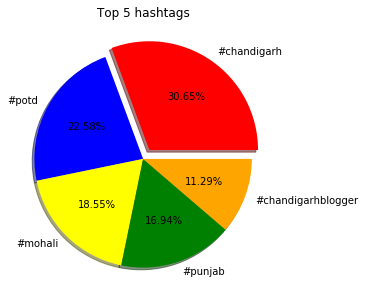

In [83]:
plt.figure(figsize=(5,5))
explode = [0 for i in range(5)]
colors = ['red', 'blue', 'yellow','green','orange']
explode[np.array([t[1] for t in hashtags]).argmax()]=0.1
plt.title("Top 5 hashtags",fontsize = 12)
plt.pie([t[1]for t in hashtags[:5]], labels = [t[0]for t in hashtags[:5]],autopct="%.2f%%", 
        explode = explode, shadow=True, colors = colors)
plt.show()

## 3. You need to also calculate average followers : likes ratio for the obtained handles. 
Followers : Likes ratio is calculated as follows:


1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.


In [84]:
def follower_like_ratio(driver):
    wait = WebDriverWait(driver, 5)
    #Try locating the followers button to get the total number of followers
    try : 
        followers_ele = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        followers = int(followers_ele.get_attribute('title').replace(',' , ''))  
    except Exception as e:     
        print('Cant access followers')
    
    #Open the first post
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    #Create a list to keep an account of like of each post
    lst = []
    
    for i in range(10) :
        try : 
            #Get the element which shows the number of likes
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'Nm9Fw')))
            if temp.text == '' :
                temp = driver.find_elements_by_class_name('Nm9Fw')[-1]
       
            #In case of videos, likes are not visible.
            #Hence we first need to click on views then scrape the number of likes
            #Then click on outside again so that you can click on next button 
        
        except Exception as e:     
            try : 
                # Locating the views 
                driver.find_element_by_class_name('vcOH2').click()
                #getting likes
                temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))  
            except Exception as e:
                print("Loading error")
                return
      
        #Calculating likes and appending to the list
        likes = int(temp.text.split()[0].replace(',',''))
        lst.append(likes)
       
        
        #click on next button, in case of videos, next button will not be visible immidiately, first we need to click outside
        try : 
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        
        except Exception as e:
            try : 
                #click on outside
                driver.find_element_by_class_name('QhbhU').click() 
                #try to click on next button again
                nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
                nxt.click()
            except Exception as e:
                print("No more posts")
                break     
    
    #calculate likes : followers ratio
    sum_likes = sum(lst)
    print(sum_likes) 
    return sum_likes

In [ ]:
kaha pe hai prob ?

In [85]:
for i in handles:
        driver.get('https://www.instagram.com/' + str(i))
        time.sleep(3)
        print(i, 'likes on first 10 posts:')
        follower_like_ratio(driver)

yourfoodlab likes on first 10 posts:
298473
foodfoodtv likes on first 10 posts:
2918
food_lunatic likes on first 10 posts:
18066
foodfoododo likes on first 10 posts:
1771
foodiebliss09 likes on first 10 posts:
3016


2. Calculate the average likes for a handle.


In [86]:
def follower_like_ratio(driver):
    wait = WebDriverWait(driver, 5)
    #Try locating the followers button to get the total number of followers
    try : 
        followers_ele = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        followers = int(followers_ele.get_attribute('title').replace(',' , ''))  
    except Exception as e:     
        print('Cant access followers')
    
    #Open the first post
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    #Create a list to keep an account of like of each post
    lst = []
    
    for i in range(10) :
        try : 
            #Get the element which shows the number of likes
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'Nm9Fw')))
            if temp.text == '' :
                temp = driver.find_elements_by_class_name('Nm9Fw')[-1]
       
            #In case of videos, likes are not visible.
            #Hence we first need to click on views then scrape the number of likes
            #Then click on outside again so that you can click on next button 
        
        except Exception as e:     
            try : 
                # Locating the views 
                driver.find_element_by_class_name('vcOH2').click()
                #getting likes
                temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))  
            except Exception as e:
                print("Loading error")
                return
      
        #Calculating likes and appending to the list
        likes = int(temp.text.split()[0].replace(',',''))
        lst.append(likes)
       
        
        #click on next button, in case of videos, next button will not be visible immidiately, first we need to click outside
        try : 
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        
        except Exception as e:
            try : 
                #click on outside
                driver.find_element_by_class_name('QhbhU').click() 
                #try to click on next button again
                nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
                nxt.click()
            except Exception as e:
                print("No more posts")
                break     
    
    #calculate likes : followers ratio
    avg_likes = sum(lst)/len(lst)
    print(avg_likes) 
    ratio = followers/avg_likes
    return ratio

In [87]:
for j in handles:
        driver.get('https://www.instagram.com/' + str(j))
        time.sleep(3)
        print(j, 'average likes:')
        follower_like_ratio(driver)

yourfoodlab average likes:
29855.2
foodfoodtv average likes:
291.8
food_lunatic average likes:
1808.9
foodfoododo average likes:
177.1
foodiebliss09 average likes:
301.7


3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.


In [93]:
def all_pages_ratio(insta_handles) :
    handle_ratio = {} # making dict for name and its ratio
    for j in insta_handles : # visiting each handle
        driver.get('https://www.instagram.com/' + str(j))
        time.sleep(3)
        handle_ratio[str(j)] = follower_like_ratio(driver) # storing ratio of each handle along with it's name
        
    return handle_ratio

In [94]:
handle_ratio = all_pages_ratio(handles)
handle_ratio
# ye theek solve kiya hai? aapne git waale se verify kia ? yesek baar open krna vo 

29887.6
292.1
1818.6
177.9
301.7


{'yourfoodlab': 46.49051780671583,
 'foodfoodtv': 843.2386169120164,
 'food_lunatic': 50.965577917079074,
 'foodfoododo': 34.997189432265316,
 'foodiebliss09': 54.19622141199868}

4. Create a bar graph to depict the above obtained information.

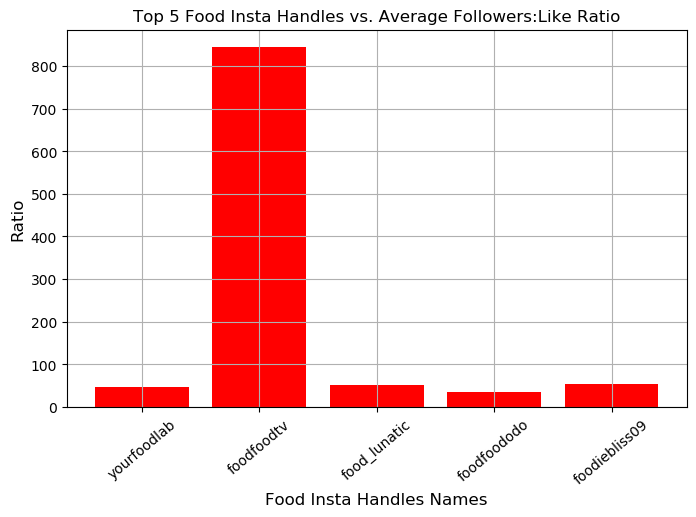

In [103]:
handle_name = handle_ratio.keys() # names of the handles
handle_like_ratio = handle_ratio.values() # their Follower : Like ratio

plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green') # for size of graph
plt.grid()
plt.bar(handle_name, handle_like_ratio, color = 'red')
plt.title('Top 5 Food Insta Handles vs. Average Followers:Like Ratio')
plt.xlabel('Food Insta Handles Names', size = 12)
plt.ylabel('Ratio', size = 12)
plt.xticks(rotation = 40)
plt.show()

In [105]:
driver.quit()